In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
labels=train.label
labels.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [5]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
train[['title', 'author']] = train[['title', 'author']].fillna(value = 'Missing')
train = train.dropna()
train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

0    10387
1    10374
Name: label, dtype: int64


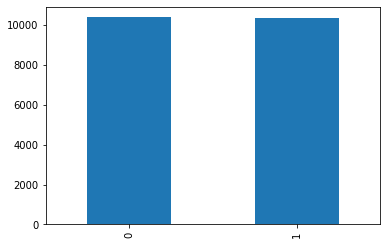

In [7]:
print(train['label'].value_counts())
train['label'].value_counts().plot.bar()

In [8]:
labels=train.label
labels.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [9]:
length = []
[length.append(len(str(text))) for text in train['text']]
train['length'] = length
train.head()

,id,title,author,text,label,length
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,4160
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7692
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,3237
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,938


In [10]:
x_train,x_test,y_train,y_test=train_test_split(train['text'], labels, test_size=0.2)

In [11]:
x_train.size, y_train.size

(16608, 16608)

In [12]:
x_test.size, y_test.size

(4153, 4153)

In [13]:
type(x_test)

pandas.core.series.Series

In [14]:
tfidf_vect = TfidfVectorizer(stop_words = 'english')
tfidf_train = tfidf_vect.fit_transform(x_train)
tfidf_test = tfidf_vect.transform(x_test)
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vect.get_feature_names())

In [17]:
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train, y_train)
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print("accuracy:   %0.2f" % score)

accuracy:   0.97


In [16]:
cm =confusion_matrix(y_test,y_pred)
cm

array([[2047,   69],
       [  74, 1963]], dtype=int64)